# Predicting Time for Ball Counting Game Using Machine Learning[SUPPORT VECTOR REGRESSOR]

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load Dataset

In [2]:
df = pd.read_csv("C:/Users/Thaarani Sivakkumar/Desktop/INTERNSHIP/Time_Data_All_P1_to_P10.csv")
df['Person'] = df['Person'].astype('category')
df.head()

,Person,Time_2,Time_3,Time_4,Time_5
0,P1,16.62,19.71,21.68,28.19
1,P1,15.06,17.90,27.11,35.31
2,P1,17.23,20.51,29.36,36.71
3,P1,14.37,16.60,24.14,34.91
4,P1,15.05,19.08,23.28,27.12


In [3]:
df.tail()

,Person,Time_2,Time_3,Time_4,Time_5
195,P10,16.81,23.72,27.05,34.31
196,P10,16.68,19.61,23.89,26.90
197,P10,14.90,20.33,25.58,31.03
198,P10,15.41,19.26,24.15,24.40
199,P10,21.93,26.43,33.20,39.98


In [4]:
df.describe()

,Time_2,Time_3,Time_4,Time_5
count,200.000000,200.000000,200.000000,200.000000
mean,17.449050,22.351550,27.875750,33.849050
std,2.652536,3.184059,3.666845,4.189166
min,10.750000,15.830000,18.780000,23.290000
25%,15.552500,19.967500,25.290000,30.657500
50%,17.445000,22.285000,27.610000,33.865000
75%,18.922500,24.235000,30.485000,36.640000
max,24.720000,31.690000,38.510000,45.910000


## Data Preprocessing

In [5]:
print("Missing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

Missing Values:
Person    0
Time_2    0
Time_3    0
Time_4    0
Time_5    0
dtype: int64

Data Types:
Person    category
Time_2     float64
Time_3     float64
Time_4     float64
Time_5     float64
dtype: object


## Exploratory Data Analysis (EDA)

### Line Plot - Average time by person

C:\Users\Thaarani Sivakkumar\AppData\Local\Temp\ipykernel_16944\2386762089.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby("Person").mean(numeric_only=True)


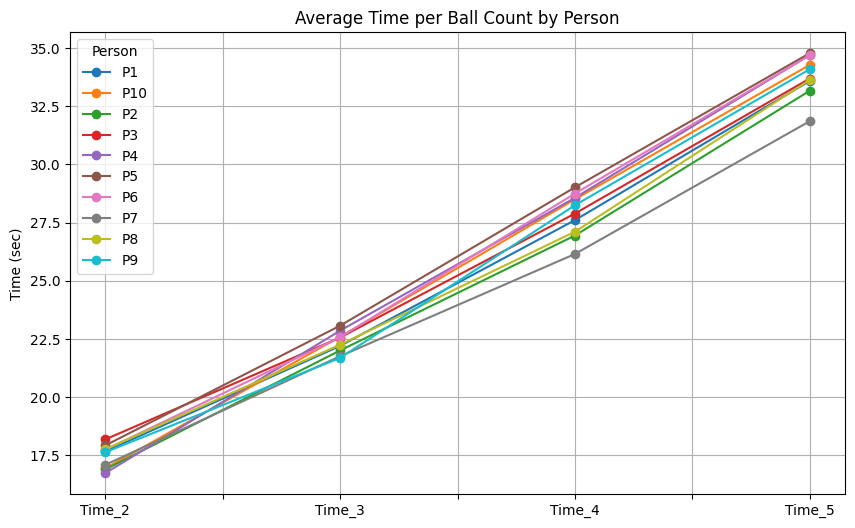

In [6]:
df_grouped = df.groupby("Person").mean(numeric_only=True)
df_grouped.T.plot(marker='o', figsize=(10, 6), title="Average Time per Ball Count by Person")
plt.ylabel("Time (sec)")
plt.grid()
plt.show()

### Boxplot

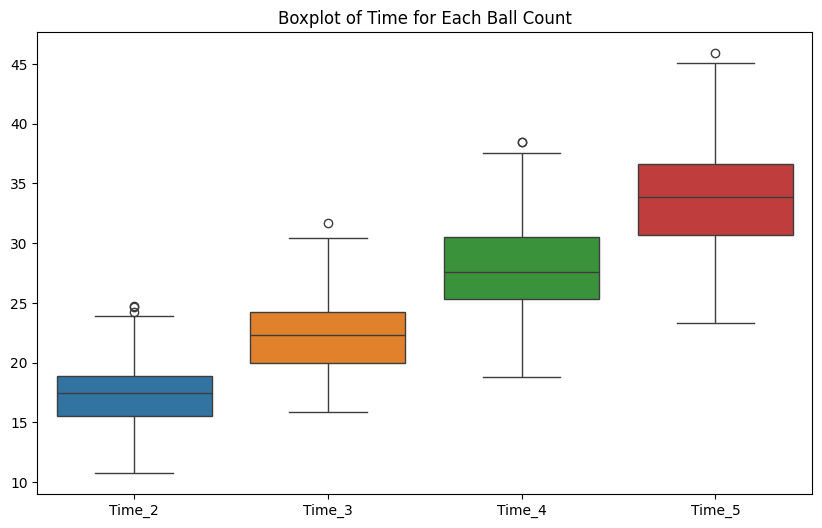

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["Person"]))
plt.title("Boxplot of Time for Each Ball Count")
plt.show()

### KDE Plot

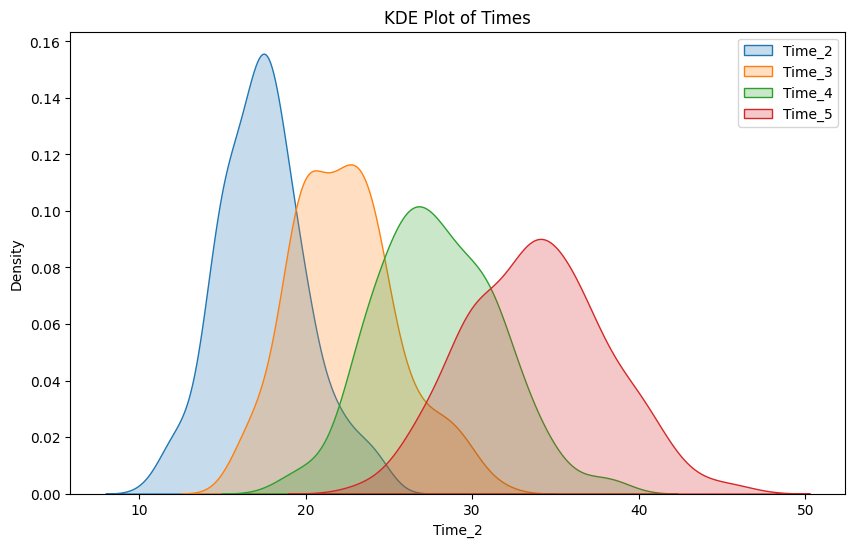

In [8]:
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    sns.kdeplot(df[col], label=col, fill=True)
plt.title("KDE Plot of Times")
plt.legend()
plt.show()

### Pairplot

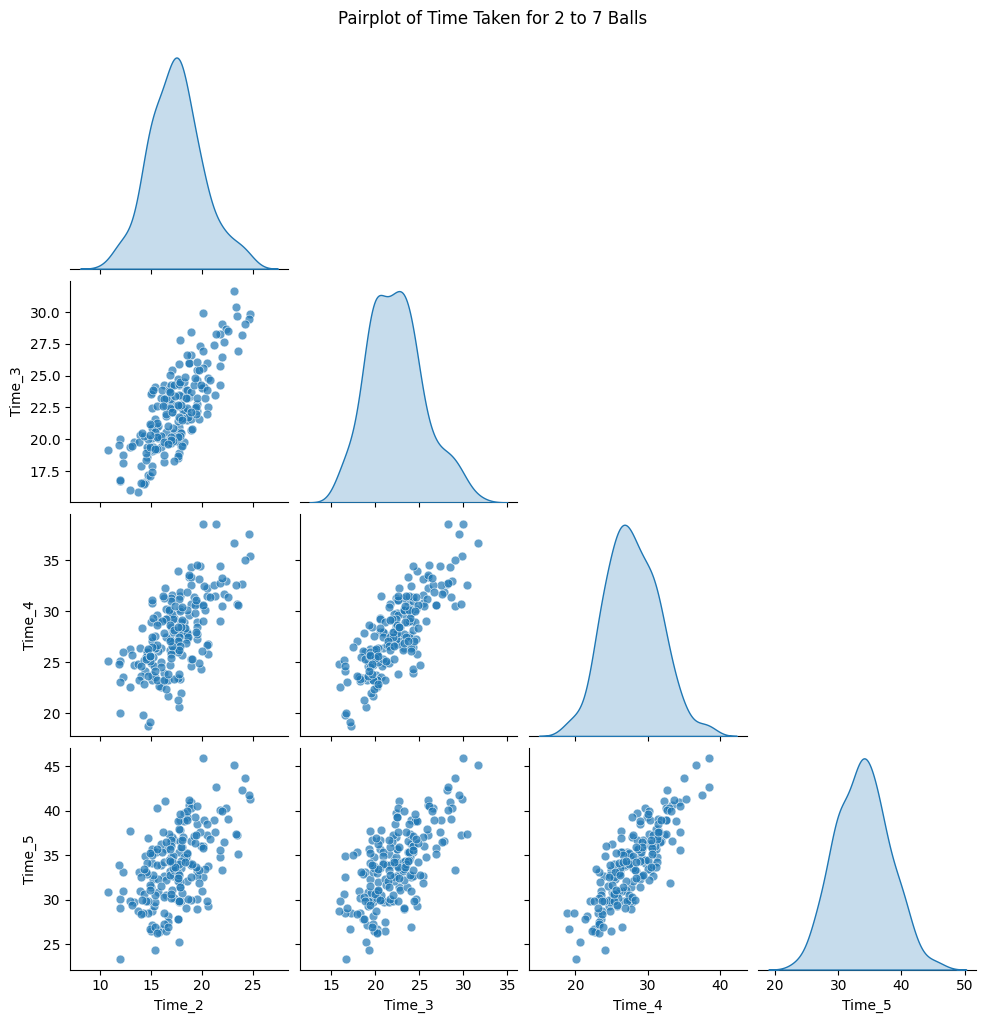

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df.drop(columns=['Person']), 
    kind='scatter', 
    diag_kind='kde', 
    corner=True,
    plot_kws={'alpha': 0.7, 's': 40}
)

plt.suptitle("Pairplot of Time Taken for 2 to 7 Balls", y=1.02)
plt.show()

### Violin Plot

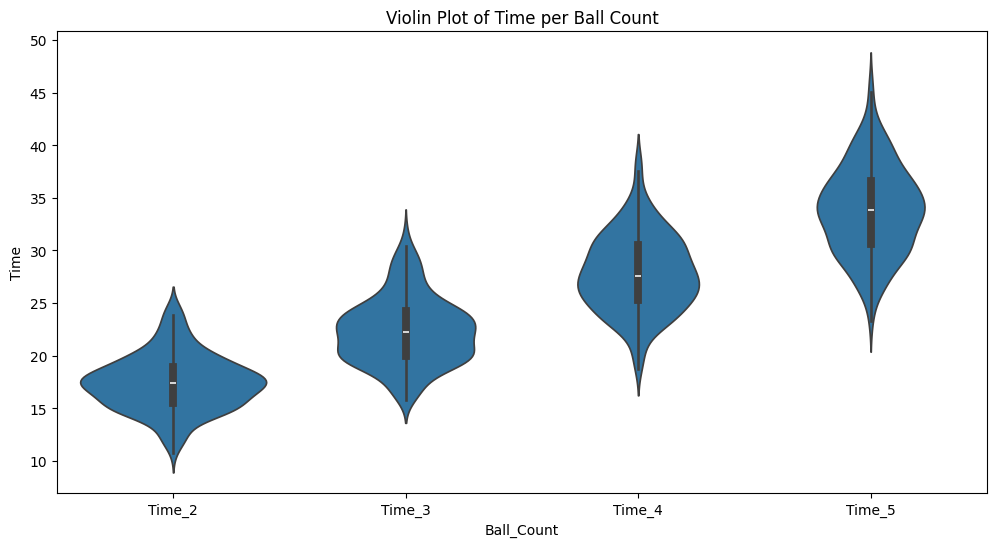

In [10]:
melted_df = df.melt(id_vars="Person", var_name="Ball_Count", value_name="Time")
plt.figure(figsize=(12, 6))
sns.violinplot(x="Ball_Count", y="Time", data=melted_df)
plt.title("Violin Plot of Time per Ball Count")
plt.show()

### Correlation Heatmap

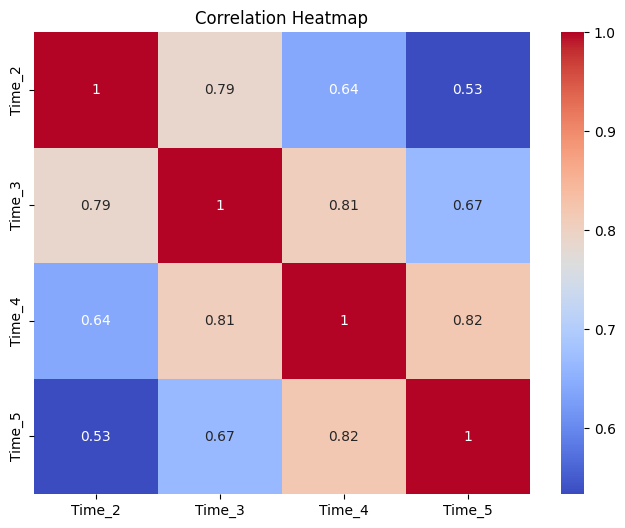

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns="Person").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Train/Test Split

In [12]:
X = df[["Time_2", "Time_3", "Time_4"]]
y = df["Time_5"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features (X)
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape y to 2D before scaling
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Scale target (y)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

## Train a Regression Model

In [14]:
from sklearn.svm import SVR

# Model
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train_scaled)

# Predict and inverse scale
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate
def evaluate(true, pred):
    print("MAE :", mean_absolute_error(true, pred))
    print("MSE :", mean_squared_error(true, pred))
    print("RMSE:", np.sqrt(mean_squared_error(true, pred)))
    print("R²  :", r2_score(true, pred))

evaluate(y_test, y_pred)

MAE : 1.5955898751616353
MSE : 4.841883328617196
RMSE: 2.200427987600866
R²  : 0.6703057035509694


C:\Users\Thaarani Sivakkumar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Residual plot

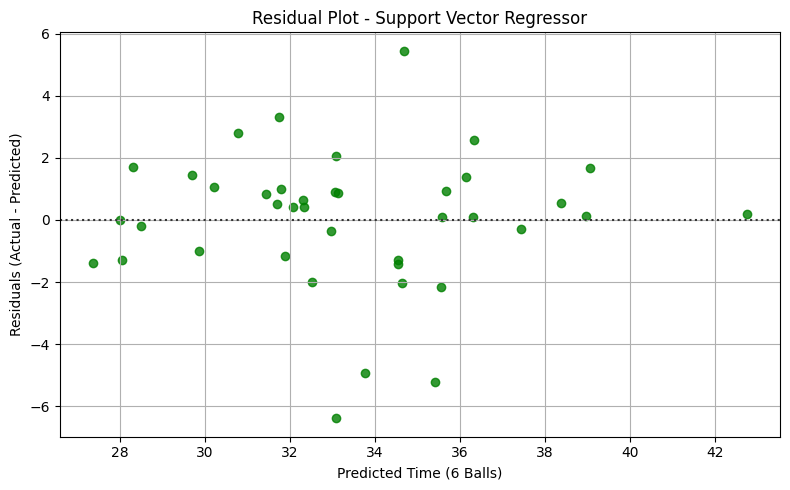

In [15]:
# Residual Plot for SVR
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, color="green", line_kws={"color": "red"})
plt.xlabel("Predicted Time (6 Balls)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Support Vector Regressor")
plt.grid(True)
plt.tight_layout()
plt.show()


## Predict for a New Student

In [ ]:
# User Input for New Player
print("\n Welcome to the Ball Game Predictor!")
print("Please enter your time (in seconds) for solving with the following number of balls:")

time2 = float(input("Time for 2 balls: "))
time3 = float(input("Time for 3 balls: "))
time4 = float(input("Time for 4 balls: "))

# Create input array
new_input = [[time2, time3, time4]]

# Scale input if using StandardScaler
new_input_scaled = scaler_X.transform(new_input)

# Predict time for 5 balls
predicted_5_scaled = model.predict(new_input_scaled)
predicted_5 = scaler_y.inverse_transform(predicted_5_scaled.reshape(-1, 1)).ravel()[0]

# Assigning cognitive score based on predicted time
if predicted_5 < 25:
    score = "Excellent Thinking Speed!"
elif predicted_5 < 30:
    score = "Good Cognitive Performance!"
elif predicted_5 < 35:
    score = "Average Processing Time."
else:
    score = "Needs More Practice to Improve."

# Display Result
print(f"\nPredicted Time for 5 Balls: {predicted_5:.2f} seconds")
print(f"Your Intellectual Score: {score}")
print("\nThanks for playing the game! Keep learning!")


 Welcome to the Ball Game Predictor!
Please enter your time (in seconds) for solving with the following number of balls:


Time for 2 balls:  14.71
Time for 3 balls:  19.97


Enter your actual time for 5 Balls (in seconds):  25.29
Enter the predicted time for 5 Balls (in seconds):  28.72



Error Percentage     : 13.56%
Accuracy Percentage : 86.44%


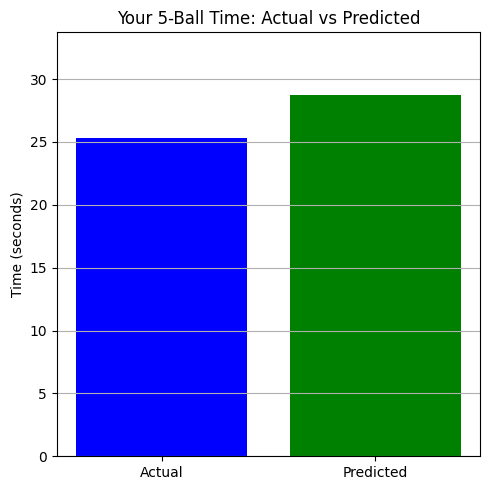

In [31]:
import matplotlib.pyplot as plt  

# Get actual and predicted times from user
try:
    your_actual = float(input("Enter your actual time for 5 Balls (in seconds): ").strip())
    your_predicted = float(input("Enter the predicted time for 5 Balls (in seconds): ").strip())

    # Calculate error % and accuracy %
    error_percentage = abs(your_actual - your_predicted) / your_actual * 100
    accuracy_percentage = 100 - error_percentage

    # Print the results
    print(f"\nError Percentage     : {error_percentage:.2f}%")
    print(f"Accuracy Percentage : {accuracy_percentage:.2f}%")

    #  Plot bar chart
    plt.figure(figsize=(5, 5))
    plt.bar(["Actual", "Predicted"], [your_actual, your_predicted], color=["blue", "green"])
    plt.title("Your 5-Ball Time: Actual vs Predicted")
    plt.ylabel("Time (seconds)")
    plt.ylim(0, max(your_actual, your_predicted) + 5)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

except ValueError:
    print(" Invalid input! Please enter numeric values only.")
